## Group Assignment 

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
# import cv2
from pathlib import Path
import tensorflow as tf

print(tf.__version__)
print(tf.test.is_gpu_available())

2.9.0
True


In [208]:

train_image_dir = Path('/Users/raychiu/Desktop/Spring 2023/552/Landmarks-v1_1')

train_file_paths = list(train_image_dir.glob(r'**/*.png')) + list(train_image_dir.glob(r'**/*.jpeg')) + list(
    train_image_dir.glob(r'**/*.jpg'))

train_file_paths = pd.Series(train_file_paths, name='Filepath').astype(str)

# get category label and lanmark label
labels1 = list(map(lambda x: os.path.split(os.path.split(os.path.split(x)[0])[0])[1], train_file_paths))
labels2 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_file_paths))
labels1 = pd.Series(labels1, name='Label1')
labels2 = pd.Series(labels2, name='Label2')

all_train_df = pd.concat([train_file_paths, labels1, labels2], axis=1)
all_train_df.columns = ["Image_path", "Label1", "Label2"]

all_train_df = all_train_df.sample(frac=1).reset_index(drop=True)

all_train_df

,Image_path,Label1,Label2
0,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Gothic,MilanCathedral
1,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Modern,Cathedral of Bras§ia
2,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Mughal,Tomb of Akbar
3,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Gothic,MilanCathedral
4,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Mughal,Bibi Ka Maqbara
...,...,...,...
410,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Modern,CCTV Headquarters
411,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,Pyramid of Giza
412,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,Santa Cecilia Acatitlan Pyramid
413,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Gothic,ChartresCathedral


## Dataframes


In [209]:
train_df, test_df = train_test_split(all_train_df, test_size=.2,random_state = 42)
train_df

,Image_path,Label1,Label2
249,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Gothic,ChartresCathedral
364,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,Pyramid of Giza
193,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,"El Castillo, Chichen Itza"
152,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,Pyramid of Giza
5,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Modern,CCTV Headquarters
...,...,...,...
71,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pagodas,FogongTemplePagoda
106,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,Santa Cecilia Acatitlan Pyramid
270,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Mughal,Tomb of Akbar
348,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Mughal,Bibi Ka Maqbara


In [210]:
test_df

,Image_path,Label1,Label2
55,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Modern,CCTV Headquarters
140,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,Pyramid of Giza
175,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Gothic,ChartresCathedral
56,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Mughal,Jama Masjid
341,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,"El Castillo, Chichen Itza"
...,...,...,...
234,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Mughal,Jama Masjid
337,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,Louvre Pyramid
31,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pyramids,Louvre Pyramid
284,/Users/raychiu/Desktop/Spring 2023/552/Landmar...,Pagodas,FogongTemplePagoda


## Category classification (6 categories)

In [252]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    # rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
    #adding Data Augmentation
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

In [253]:
train_images = train_generator.flow_from_dataframe(
    dataframe=all_train_df,
    x_col='Image_path',
    y_col='Label1',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=all_train_df,
    x_col='Image_path',
    y_col='Label1',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image_path',
    y_col='Label1',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)
test_data = test_generator.flow_from_directory(
    '/Users/raychiu/Downloads/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)
cate_labels = (test_images.class_indices)
print(cate_labels)
cate_labels = dict((v, k) for k, v in cate_labels.items())


Found 332 validated image filenames belonging to 6 classes.
Found 83 validated image filenames belonging to 6 classes.
Found 83 validated image filenames belonging to 6 classes.
Found 6 images belonging to 1 classes.
{'Gothic': 0, 'Modern': 1, 'Mughal': 2, 'Neoclassical': 3, 'Pagodas': 4, 'Pyramids': 5}


In [247]:
# load vgg16
category_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg',
    classifier_activation='softmax'
)
category_model.trainable = False

In [248]:
inputs = category_model.input


x = tf.keras.layers.Dense(256, activation='relu')(category_model.output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

category_model = tf.keras.Model(inputs=inputs, outputs=outputs)

category_model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [250]:
import time

category_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

wall_t1 = time.time()
cpu_t1  = time.process_time()

history = category_model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            mode='min',
            patience=4,
            restore_best_weights=True
        )
    ]
)

cpu_t2 = time.process_time()
wall_t2 = time.time()

/Users/raychiu/miniconda/lib/python3.10/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/raychiu/miniconda/lib/python3.10/site-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
11/11 [==============================] - 10s 814ms/step - loss: 7.1466 - accuracy: 0.2259 - val_loss: 1.4501 - val_accuracy: 0.5060
Epoch 2/50
11/11 [==============================] - 8s 779ms/step - loss: 3.3598 - accuracy: 0.2922 - val_loss: 1.1363 - val_accuracy: 0.5663
Epoch 3/50
11/11 [==============================] - 9s 814ms/step - loss: 2.4817 - accuracy: 0.4096 - val_loss: 0.9199 - val_accuracy: 0.6386
Epoch 4/50
11/11 [==============================] - 8s 755ms/step - loss: 2.0024 - accuracy: 0.4488 - val_loss: 0.7844 - val_accuracy: 0.7108
Epoch 5/50
11/11 [==============================] - 8s 744ms/step - loss: 1.4323 - accuracy: 0.5151 - val_loss: 0.7806 - val_accuracy: 0.7470
Epoch 6/50
11/11 [==============================] - 8s 735ms/step - loss: 1.4865 - accuracy: 0.5211 - val_loss: 0.8475 - val_accuracy: 0.7349
Epoch 7/50
11/11 [==============================] - 8s 766ms/step - loss: 1.2746 - accuracy: 0.5633 - val_loss: 0.6783 - val_accuracy: 0.7470
Epoch

In [217]:
print("wall_time:",(wall_t2 - wall_t1))
print("cpu time:",(cpu_t2 - cpu_t1))

wall_time: 261.5972709655762
cpu time: 275.3608270000004


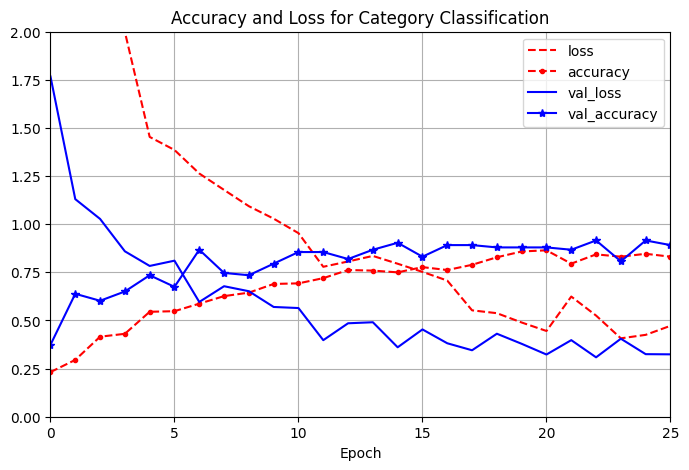

In [218]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 25], ylim=[0, 2], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.title("Accuracy and Loss for Category Classification")
plt.show()

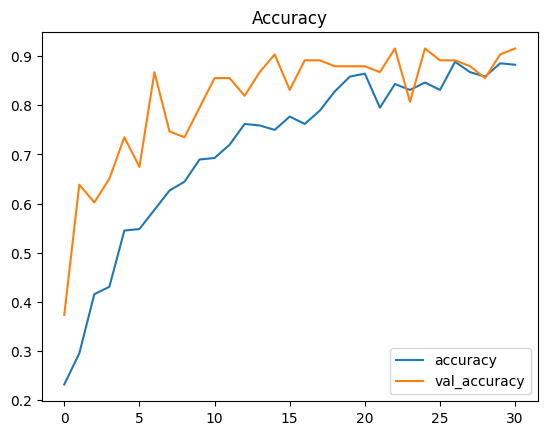

In [219]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

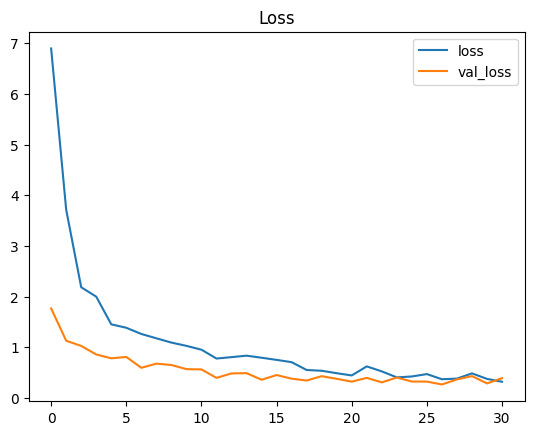

In [220]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [251]:
results = category_model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.16717
Test Accuracy: 95.18%


In [222]:
pred = category_model.predict(test_images)
confidence = np.max(pred, axis=1)
pred = np.argmax(pred, axis=1)
labels = (test_images.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]

3/3 [==============================] - 1s 328ms/step


In [223]:
pred3 = category_model.predict(test_data)

1/1 [==============================] - 0s 308ms/step


In [224]:
from sklearn.metrics import classification_report

y_test = list(test_df.Label1)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Gothic       1.00      1.00      1.00        13
      Modern       1.00      0.93      0.97        15
      Mughal       0.94      1.00      0.97        17
Neoclassical       1.00      0.90      0.95        10
     Pagodas       1.00      1.00      1.00        11
    Pyramids       0.94      1.00      0.97        17

    accuracy                           0.98        83
   macro avg       0.98      0.97      0.98        83
weighted avg       0.98      0.98      0.98        83



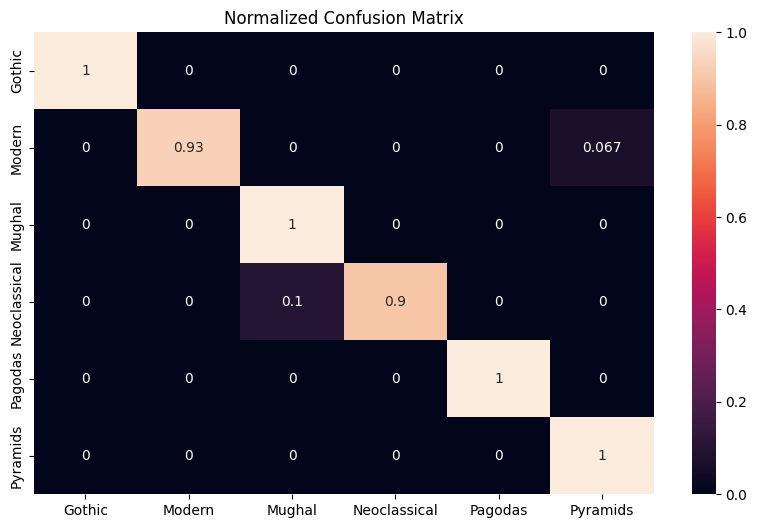

In [225]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix, annot=True, xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

In [243]:
category_model.save('cate4.h5')

## EfficientNetB0 for landmark classification

In [227]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    # rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip=True,
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input
)

In [245]:
train_images = train_generator.flow_from_dataframe(
    dataframe=all_train_df,
    x_col='Image_path',
    y_col='Label2',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=all_train_df,
    x_col='Image_path',
    y_col='Label2',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image_path',
    y_col='Label2',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)
test_data = test_generator.flow_from_directory(
    '/Users/raychiu/Downloads/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)
land_labels = (test_images.class_indices)
print(land_labels)
land_labels = dict((v, k) for k, v in land_labels.items())
print(train_images.shape())


Found 332 validated image filenames belonging to 30 classes.
Found 83 validated image filenames belonging to 30 classes.
Found 83 validated image filenames belonging to 30 classes.
Found 6 images belonging to 1 classes.
{'Academy of Athens': 0, 'Bibi Ka Maqbara': 1, 'Buckingham Palace': 2, 'CCTV Headquarters': 3, 'Cathedral of Bras§ia': 4, 'ChartresCathedral': 5, 'Chrysler Building': 6, 'CologneCathedral': 7, 'Concertgebouw': 8, 'El Castillo, Chichen Itza': 9, 'FogongTemplePagoda': 10, 'GiantWildGoosePagoda': 11, 'Hallgr№skirkja': 12, 'Jama Masjid': 13, 'Louvre Pyramid': 14, 'MilanCathedral': 15, 'Notre-DameCathedral': 16, 'Panton': 17, 'Pyramid of Djoser': 18, 'Pyramid of Giza': 19, 'Ripon Building': 20, 'Santa Cecilia Acatitlan Pyramid': 21, 'ShwedagonPagoda': 22, 'St.VitusCathedral': 23, 'Taj Mahal': 24, 'ThienMuPagoda': 25, 'TianningTemplePagoda': 26, 'Tomb of Akbar': 27, 'Tomb of I_timad-ud-Daulah': 28, 'eiffel': 29}


AttributeError: 'DataFrameIterator' object has no attribute 'shape'

In [229]:
landmark_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg',
    classifier_activation='softmax'
)
landmark_model.trainable = False

In [230]:
inputs = landmark_model.input
# x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
# x = tf.keras.layers.MaxPooling2D((2, 2))(x)
# x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Dense(256, activation='relu')(landmark_model.output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(30, activation='softmax')(x)

landmark_model = tf.keras.Model(inputs=inputs, outputs=outputs)

landmark_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [231]:
import time
landmark_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

wall_t1 = time.time()
cpu_t1  = time.process_time()
history = landmark_model.fit(
    train_images,
    validation_data=val_images,

    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            mode='min',
            patience=4,
            restore_best_weights=True
        )
    ]
)
cpu_t2 = time.process_time()
wall_t2 = time.time()

/Users/raychiu/miniconda/lib/python3.10/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/raychiu/miniconda/lib/python3.10/site-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
11/11 [==============================] - 10s 803ms/step - loss: 9.9214 - accuracy: 0.0241 - val_loss: 3.5756 - val_accuracy: 0.1325
Epoch 2/50
11/11 [==============================] - 8s 774ms/step - loss: 5.3962 - accuracy: 0.0512 - val_loss: 3.2905 - val_accuracy: 0.0843
Epoch 3/50
11/11 [==============================] - 8s 771ms/step - loss: 4.0868 - accuracy: 0.0783 - val_loss: 3.3109 - val_accuracy: 0.0361
Epoch 4/50
11/11 [==============================] - 8s 772ms/step - loss: 4.0004 - accuracy: 0.0813 - val_loss: 3.2749 - val_accuracy: 0.0602
Epoch 5/50
11/11 [==============================] - 8s 751ms/step - loss: 3.6683 - accuracy: 0.0753 - val_loss: 3.1382 - val_accuracy: 0.1084
Epoch 6/50
11/11 [==============================] - 9s 780ms/step - loss: 3.3808 - accuracy: 0.1054 - val_loss: 3.1000 - val_accuracy: 0.1084
Epoch 7/50
11/11 [==============================] - 8s 807ms/step - loss: 3.4646 - accuracy: 0.0904 - val_loss: 3.0824 - val_accuracy: 0.1928
Epoch

In [232]:
print("wall_time:",(wall_t2 - wall_t1))
print("cpu time:",(cpu_t2 - cpu_t1))

wall_time: 422.8756239414215
cpu time: 444.2152470000001


In [233]:
landmark_model.save('land6.h5')

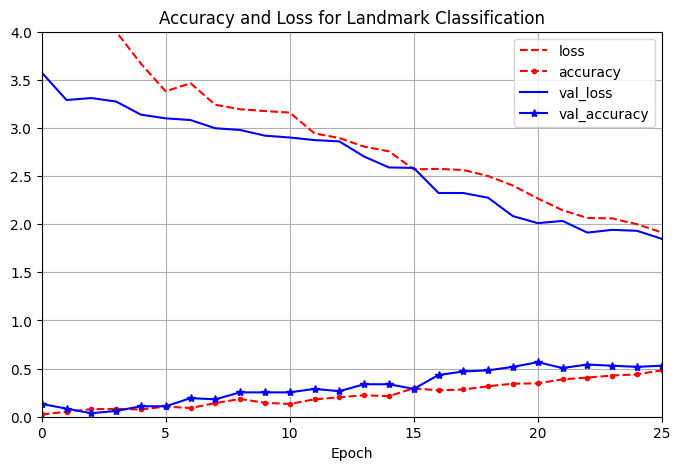

In [234]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 25], ylim=[0, 4], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.title("Accuracy and Loss for Landmark Classification")
plt.show()

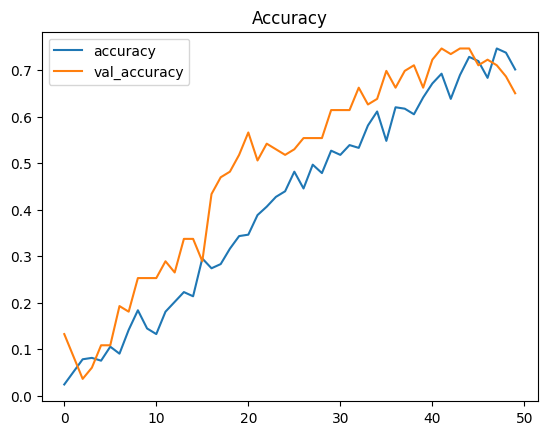

In [235]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

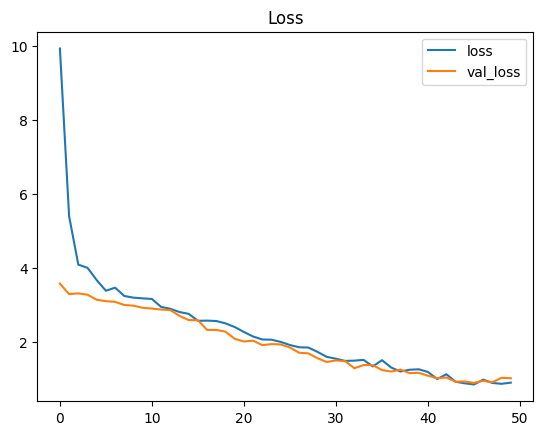

In [236]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [237]:
results = landmark_model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.31938
Test Accuracy: 91.57%


In [238]:

pred2 = landmark_model.predict(test_images)
pred2 = np.argmax(pred2, axis=1)
labels = (test_images.class_indices)
print(labels)
labels = dict((v, k) for k, v in labels.items())

pred2 = [labels[k] for k in pred2]
print(pred2)

3/3 [==============================] - 1s 432ms/step
{'Academy of Athens': 0, 'Bibi Ka Maqbara': 1, 'Buckingham Palace': 2, 'CCTV Headquarters': 3, 'Cathedral of Bras§ia': 4, 'ChartresCathedral': 5, 'Chrysler Building': 6, 'CologneCathedral': 7, 'Concertgebouw': 8, 'El Castillo, Chichen Itza': 9, 'FogongTemplePagoda': 10, 'GiantWildGoosePagoda': 11, 'Hallgr№skirkja': 12, 'Jama Masjid': 13, 'Louvre Pyramid': 14, 'MilanCathedral': 15, 'Notre-DameCathedral': 16, 'Panton': 17, 'Pyramid of Djoser': 18, 'Pyramid of Giza': 19, 'Ripon Building': 20, 'Santa Cecilia Acatitlan Pyramid': 21, 'ShwedagonPagoda': 22, 'St.VitusCathedral': 23, 'Taj Mahal': 24, 'ThienMuPagoda': 25, 'TianningTemplePagoda': 26, 'Tomb of Akbar': 27, 'Tomb of I_timad-ud-Daulah': 28, 'eiffel': 29}
['CCTV Headquarters', 'Pyramid of Giza', 'ChartresCathedral', 'Jama Masjid', 'El Castillo, Chichen Itza', 'El Castillo, Chichen Itza', 'Louvre Pyramid', 'ChartresCathedral', 'Tomb of I_timad-ud-Daulah', 'Cathedral of Bras§ia', 'Gia

In [239]:
from sklearn.metrics import classification_report

y_test = list(test_df.Label2)
print(classification_report(y_test, pred2))

                                 precision    recall  f1-score   support

              Academy of Athens       1.00      1.00      1.00         2
                Bibi Ka Maqbara       0.00      0.00      0.00         1
              Buckingham Palace       0.75      1.00      0.86         3
              CCTV Headquarters       1.00      1.00      1.00         3
           Cathedral of Bras§ia       1.00      1.00      1.00         3
              ChartresCathedral       0.75      0.75      0.75         4
              Chrysler Building       0.50      1.00      0.67         1
               CologneCathedral       1.00      0.67      0.80         3
                  Concertgebouw       1.00      1.00      1.00         2
      El Castillo, Chichen Itza       1.00      0.67      0.80         3
             FogongTemplePagoda       1.00      1.00      1.00         4
           GiantWildGoosePagoda       1.00      1.00      1.00         1
                 Hallgr№skirkja       1.00      1.

/Users/raychiu/miniconda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raychiu/miniconda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raychiu/miniconda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


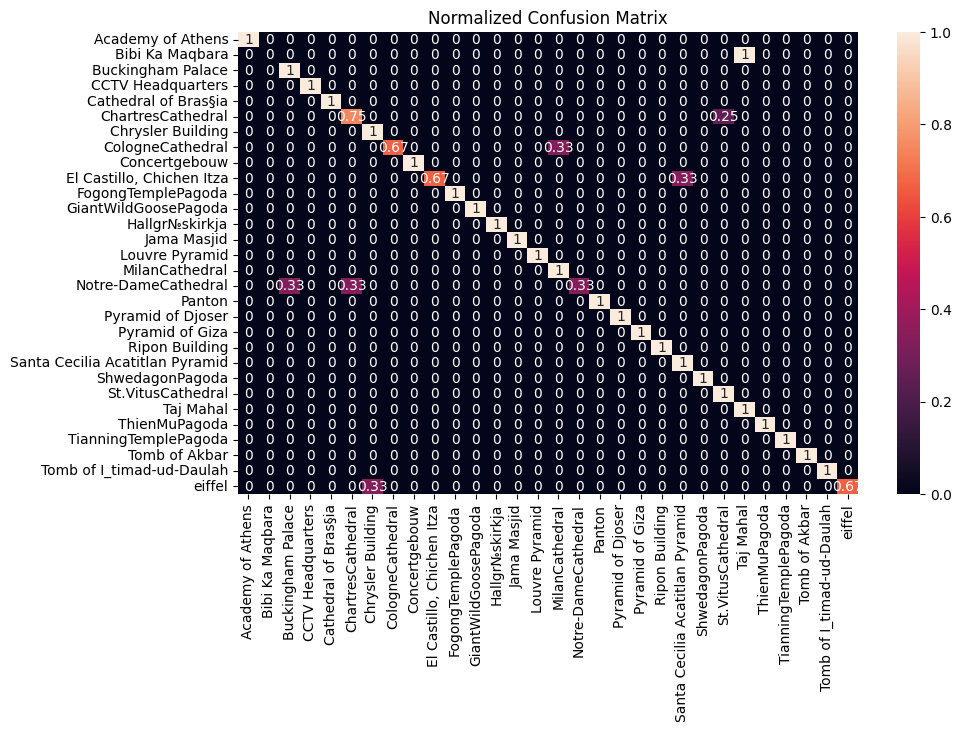

In [240]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred2, normalize='true')
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix, annot=True, xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

In [241]:
landmark_model.save('land.h5')

In [242]:
def model_prediction(test_images):
    # categories
    # categories = ['Pagodas','Pyramids','Modern','Gothic','Mughal','Neoclassical']
    categories = ['Gothic','Modern','Mughal','Neoclassical','Pagodas','Pyramids']
    # landmarks
    # landmarks = [
    #     'TianningTemplePagoda','ThienMuPagoda','GiantWildGoosePagoda','ShwedagonPagoda',
    #     'FogongTemplePagoda','Pyramid of Giza','Pyramid of Djoser','Santa Cecilia Acatitlan Pyramid',
    #     'El Castillo, Chichen Itza','Louvre Pyramid','Chrysler Building','Cathedral of Brasília',
    #     'CCTV Headquarters','Hallgrímskirkja','eiffel','St.VitusCathedral',
    #     'MilanCathedral','ChartresCathedral','CologneCathedral','Notre-DameCathedral',
    #     'Taj Mahal','Tomb of Akbar','Jama Masjid','Tomb of I_timad-ud-Daulah',
    #     'Bibi Ka Maqbara','Buckingham Palace','Concertgebouw',
    #     'Academy of Athens','Panthéon','Ripon Building','other']
    landmarks = ['Academy of Athens', 'Bibi Ka Maqbara', 'Buckingham Palace', 
              'CCTV Headquarters', 'Cathedral of Brasília', 'ChartresCathedral', 
                 'Chrysler Building', 'CologneCathedral', 'Concertgebouw', 'El Castillo, Chichen Itza', 
                 'FogongTemplePagoda', 'GiantWildGoosePagoda','Hallgrímskirkja','Jama Masjid',
                 'Louvre Pyramid', 'MilanCathedral', 
                 'Notre-DameCathedral', 'Panton', 'Pyramid of Djoser', 'Pyramid of Giza', 
                 'Ripon Building', 'Santa Cecilia Acatitlan Pyramid', 'ShwedagonPagoda', 
                 'St.VitusCathedral', 'Taj Mahal', 'ThienMuPagoda', 'TianningTemplePagoda','Tomb of Akbar', 
                 'Tomb of I_timad-ud-Daulah','eiffel', 'other']
    
    results = []
    train_file_names = [os.path.basename(f) for f in test_images.filenames]
    # print(train_file_names)
    # random.seed(10)
    # for images in Path(test_dir).glob('*'):
    # for images in test?
    cate_pred = category_model.predict(test_images)
    confidence = np.max(cate_pred,axis=1)
    # print(confidence)
    cate_pred = np.argmax(cate_pred, axis=1)
    # print(pred)
    
    catep_labels = [categories[k] for k in cate_pred]
    # print(catep_labels,confidence)

    land_pred = landmark_model.predict(test_images)
    land_confidence = np.max(land_pred,axis=1)
    land_pred = np.argmax(land_pred, axis=1)
    # labels = (test_images.class_indices)
    # print(labels)
    # labels = dict((v, k) for k, v in labels.items())
    landp_labels = [landmarks[k] for k in land_pred]
    # print(landp_labels,land_confidence)
    # results.append([
    #     testimages.name, 
    #     random.choice(categories), random.random(), 
    #     random.choice(landmarks), random.random()])
    # prediction = pd.DataFrame(
    #     results, 
    #     columns = ['image', 'category', 'category_confidence', 'landmark', 'landmark_confidence'])
    # predictions = pd.DataFrame({'Image': train_file_names, 'category': catep_labels, 'category_confidence':confidence})

    predictions = pd.DataFrame({'Image': train_file_names, 'category': catep_labels, 'category_confidence':confidence, 'landmark':landp_labels, 'landmark_confidence':land_confidence })
    return predictions #data frame


model_prediction(test_data)

1/1 [==============================] - 0s 402ms/step


,Image,category,category_confidence,landmark,landmark_confidence
0,ChartresCathedral1.jpeg,Gothic,0.994010,ChartresCathedral,0.283170
1,ChartresCathedral10.jpeg,Gothic,1.000000,ChartresCathedral,0.684696
2,ChartresCathedral11.jpg,Gothic,0.999997,ChartresCathedral,0.714559
3,ChartresCathedral14.jpeg,Gothic,0.915608,ChartresCathedral,0.532665
4,ChartresCathedral18.jpeg,Gothic,0.991109,Notre-DameCathedral,0.214590
5,ChartresCathedral3.jpeg,Gothic,0.997491,ChartresCathedral,0.404546
